In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from glob import glob
from tensorflow import image as tfi
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from xgboost import XGBClassifier
#from cuml import RandomForestClassifier
from sklearn.svm import SVC
import cv2
import torch
import warnings
warnings.filterwarnings('ignore')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [2]:
train_path = '/kaggle/input/affectnet-training-data'
labels = os.listdir(train_path)
labels = labels[0:-1]
labels

['surprise', 'fear', 'neutral', 'sad', 'disgust', 'contempt', 'happy', 'anger']

In [3]:
labels_count = []
for i in labels:
    count = len(os.listdir(train_path + '/' + i))
    labels_count.append(count)

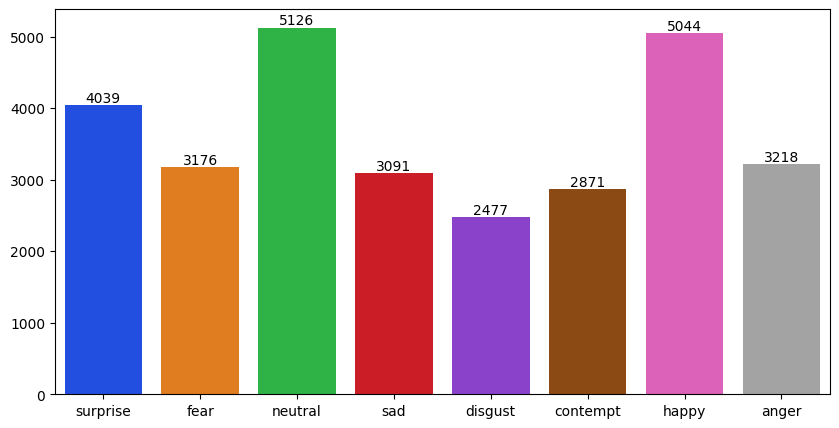

In [4]:
fig = plt.figure(figsize = (10, 5))
ax = sns.barplot(y = labels_count, x = labels, palette = 'bright')
ax.bar_label(ax.containers[0], fmt='%g', label_type = 'edge')
plt.show()

In [5]:
img1 = load_img(train_path+'/anger/image0000006.jpg')
img2 = load_img(train_path+'/contempt/ffhq_6.png')
img3 = load_img(train_path+'/disgust/ffhq_0.png')
img4 = load_img(train_path+'/fear/image0000284.jpg')
img5 = load_img(train_path+'/happy/ffhq_0.png')
img6 = load_img(train_path+'/neutral/ffhq_0.png')
img7 = load_img(train_path+'/sad/image0000013.jpg')
img8 = load_img(train_path+'/surprise/ffhq_1.png')

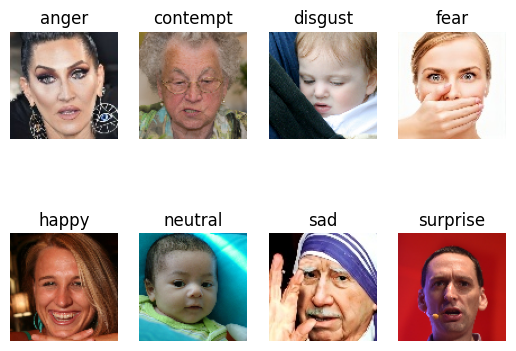

In [6]:
plt.figure()
plt.subplot(2, 4, 1)
plt.imshow(img1) # indirilen resim çizdiriliyor
plt.title('anger')
plt.axis("off")
plt.subplot(2, 4, 2)
plt.imshow(img2) # indirilen resim çizdiriliyor
plt.title('contempt')
plt.axis("off")
plt.subplot(2, 4, 3)
plt.imshow(img3) # indirilen resim çizdiriliyor
plt.title('disgust')
plt.axis("off")
plt.subplot(2, 4, 4)
plt.imshow(img4) # indirilen resim çizdiriliyor
plt.title('fear')
plt.axis("off")
plt.subplot(2, 4, 5)
plt.imshow(img5) # indirilen resim çizdiriliyor
plt.title('happy')
plt.axis("off")
plt.subplot(2, 4, 6)
plt.imshow(img6) # indirilen resim çizdiriliyor
plt.title('neutral')
plt.axis("off")
plt.subplot(2, 4, 7)
plt.imshow(img7) # indirilen resim çizdiriliyor
plt.title('sad')
plt.axis("off")
plt.subplot(2, 4, 8)
plt.imshow(img8) # indirilen resim çizdiriliyor
plt.title('surprise')
plt.axis("off")

plt.show()

In [7]:
x = img_to_array(img1)
x.shape

(96, 96, 3)

In [8]:
INPUT_PATH = '/kaggle/input/affectnet-training-data'
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (96, 96)
print(EMOTIONS)
EMOTIONS = ['surprise', 'neutral', 'sad', 'happy', 'anger','contempt', 'disgust']

['surprise', 'fear', 'neutral', 'sad', 'disgust', 'contempt', 'happy', 'anger']


In [9]:
def image_generator1(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to RGB
            #img = cv2.resize(img, image_size)
            img = img.astype('float32') / 255.0  # Normilize
            img = img.flatten()
            yield img, index

def load_images1(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator1(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [10]:
# Load the images 1
X, y = load_images1(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
input_shape = X[0].shape

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20692, 9216)
(5174, 9216)
(20692,)
(5174,)


In [13]:
param_grid = {
    'C': [1],  # Tham số điều chỉnh độ phức tạp của mô hình
    'kernel': ['rbf'],  # Kiểu kernel
    'gamma': ['scale'],  # Tham số cho kernel 'rbf' và 'poly'
    'degree': [2,3,4]  # Độ của polynomial kernel
}
rf = SVC()
rf_grid_model = GridSearchCV(rf, param_grid, verbose = 3, refit = True, scoring = "accuracy", cv = 3 )

In [14]:
rf_grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END C=1, degree=2, gamma=scale, kernel=rbf;, score=0.546 total time=39.1min
[CV 2/3] END C=1, degree=2, gamma=scale, kernel=rbf;, score=0.546 total time=39.2min
[CV 3/3] END C=1, degree=2, gamma=scale, kernel=rbf;, score=0.545 total time=39.5min
[CV 1/3] END C=1, degree=3, gamma=scale, kernel=rbf;, score=0.546 total time=39.5min
[CV 2/3] END C=1, degree=3, gamma=scale, kernel=rbf;, score=0.546 total time=40.5min
[CV 3/3] END C=1, degree=3, gamma=scale, kernel=rbf;, score=0.545 total time=40.4min
[CV 1/3] END C=1, degree=4, gamma=scale, kernel=rbf;, score=0.546 total time=40.6min
[CV 2/3] END C=1, degree=4, gamma=scale, kernel=rbf;, score=0.546 total time=41.5min
[CV 3/3] END C=1, degree=4, gamma=scale, kernel=rbf;, score=0.545 total time=40.6min


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1], 'degree': [2, 3, 4], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [15]:
rf_grid_model.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [16]:
y_pred = rf_grid_model.predict(X_test)
y_train_pred = rf_grid_model.predict(X_train)

In [17]:
print('SVM model classfication report')
print(classification_report(y_train, y_train_pred, target_names = EMOTIONS))

SVM model classfication report
              precision    recall  f1-score   support

    surprise       0.65      0.75      0.70      3219
     neutral       0.85      0.94      0.89      4089
         sad       0.67      0.68      0.67      2487
       happy       0.94      0.92      0.93      4042
       anger       0.67      0.73      0.70      2593
    contempt       0.68      0.66      0.67      2275
     disgust       0.87      0.44      0.59      1987

    accuracy                           0.77     20692
   macro avg       0.76      0.73      0.74     20692
weighted avg       0.78      0.77      0.77     20692



In [18]:
print('SVM model classfication report')
print(classification_report(y_test, y_pred, target_names = EMOTIONS))

SVM model classfication report
              precision    recall  f1-score   support

    surprise       0.41      0.50      0.45       820
     neutral       0.73      0.86      0.79      1037
         sad       0.38      0.37      0.38       604
       happy       0.87      0.81      0.84      1002
       anger       0.42      0.47      0.44       625
    contempt       0.43      0.41      0.42       596
     disgust       0.46      0.17      0.25       490

    accuracy                           0.57      5174
   macro avg       0.53      0.51      0.51      5174
weighted avg       0.57      0.57      0.56      5174



<Axes: title={'center': 'svm Model'}>

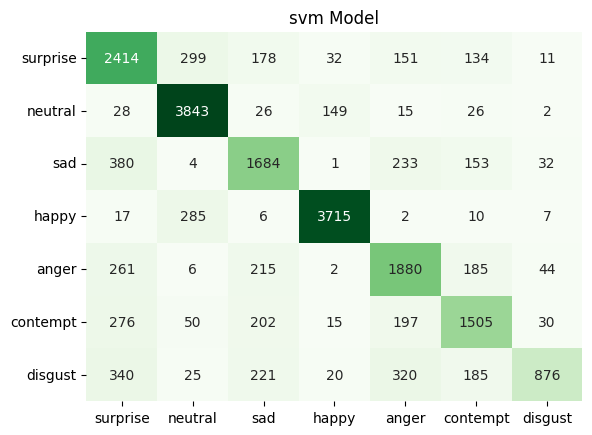

In [19]:
cm = confusion_matrix(y_train, y_train_pred)
plt.figure()
plt.title('svm Model')
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d',
            xticklabels = EMOTIONS, yticklabels = EMOTIONS)

<Axes: title={'center': 'svm Model'}>

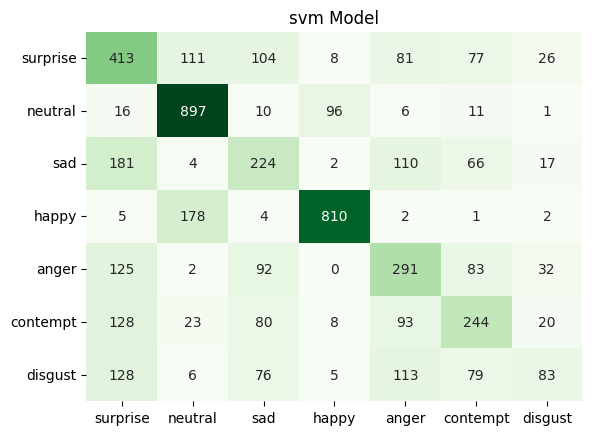

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title('svm Model')
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d',
            xticklabels = EMOTIONS, yticklabels = EMOTIONS)

In [21]:
import pickle
filename = 'rf_model.pk'
pickle.dump(rf_grid_model, open(filename, 'wb'))